Epochs = 1, MAE = 0.8096
Epochs = 5, MAE = 0.7746
Epochs = 10, MAE = 0.7738
Epochs = 50, MAE = 0.7734
Epochs = 100, MAE = 0.7732


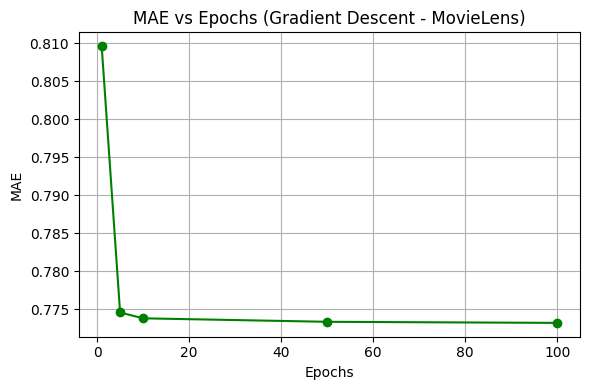

In [7]:
# Baseline Model (mu + bu + bi) with Gradient Descent - MovieLens

import pandas as pd
import numpy as np
import time
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt

num_users = 943
num_items = 1682

# Load training set
df_training = pd.read_csv('u1.base', sep='\t', names=['User ID', 'Movie ID', 'Rating', 'Timestamp'])
values = df_training.values
values[:, 0:2] -= 1

train_user_indices = values[:, 0].astype(int)
train_item_indices = values[:, 1].astype(int)
train_ratings = values[:, 2]

sp_training = sparse.csr_matrix((train_ratings, (train_user_indices, train_item_indices)),
                                shape=(num_users, num_items), dtype=np.float64)

# Load test set
df_test = pd.read_csv('u1.test', sep='\t', names=['User ID', 'Movie ID', 'Rating', 'Timestamp'])
values = df_test.values
values[:, 0:2] -= 1

data = values[:, 2]
rows = values[:, 0]
cols = values[:, 1]
sp_test = sparse.csr_matrix((data, (rows, cols)), shape=(num_users, num_items), dtype=np.float64)

# Parameters
lr = 0.05  # Learning rate
reg = 0.02  # Regularization term
epoch_list = [1, 5, 10, 50, 100]
mae_list = []

# Define computeMAE and predict
def predict(user, item):
    return mu + bu[user] + bi[item]

def computeMAE():
    MAE = 0.0
    rows, cols = sp_test.nonzero()
    for j in range(len(rows)):
        actual = sp_test[rows[j], cols[j]]
        predicted = predict(rows[j], cols[j])
        MAE += abs(actual - predicted)
    MAE /= len(rows)
    return MAE

# Compute global mean
mu = sp_training.data.mean()

# Training and evaluation loop
for epochs in epoch_list:
    bu = np.zeros(num_users)
    bi = np.zeros(num_items)

    for epoch in range(epochs):
        for u, i, r in zip(train_user_indices, train_item_indices, train_ratings):
            pred = mu + bu[u] + bi[i]
            err = r - pred
            bu[u] += lr * (err - reg * bu[u])
            bi[i] += lr * (err - reg * bi[i])

    mae = computeMAE()
    print(f"Epochs = {epochs}, MAE = {mae:.4f}")
    mae_list.append(mae)

# Plot MAE vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(epoch_list, mae_list, marker='o', color='green')
plt.title('MAE vs Epochs (Gradient Descent - MovieLens)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid(True)
plt.tight_layout()
plt.show()
